In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import os
print(os.getcwd())
os.chdir("C:/Users/Masters/Downloads/data") 

c:\Users\Masters\Downloads\data


In [3]:
df = pd.read_csv("application_data.csv")
print(df.shape)
print(df.columns)
df.head()
missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (missing / len(df)) * 100
percent_missing[percent_missing > 0].head(30)
# كثير اوي وبامانه معنديش اي فكره اعمل ايه لول !!

(307511, 122)
Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
COMMONAREA_MEDI             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
FLOORSMIN_MODE              67.848630
FLOORSMIN_AVG               67.848630
FLOORSMIN_MEDI              67.848630
YEARS_BUILD_AVG             66.497784
YEARS_BUILD_MODE            66.497784
YEARS_BUILD_MEDI            66.497784
OWN_CAR_AGE                 65.990810
LANDAREA_MEDI               59.376738
LANDAREA_AVG                59.376738
LANDAREA_MODE               59.376738
BASEMENTAREA_MODE           58.515956
BASEMENTAREA_MEDI           58.515956
BASEMENTAREA_AVG            58.515956
EXT_SOURCE_1                56.381073
NONLIVINGAREA_MODE          55.179164
NONLIVINGAREA_AVG           55.179164
NONLIVINGARE

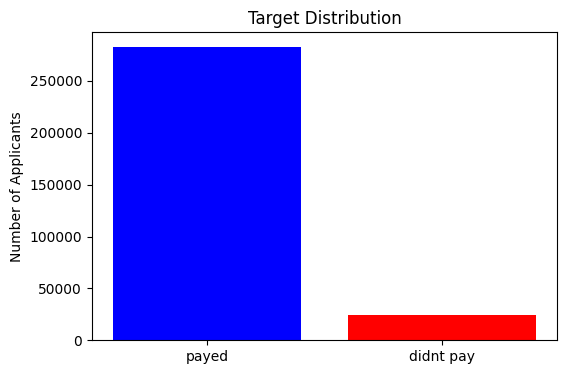

TARGET
0    282686
1     24825
Name: count, dtype: int64


In [4]:
#did the applicant pay or didnt he !
target_counts = df['TARGET'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(target_counts.index, target_counts.values, color=['blue', 'red'])
plt.title('Target Distribution')
plt.ylabel('Number of Applicants')
plt.xticks([0, 1], ['payed', 'didnt pay'])
plt.show()

print(target_counts)

C:\Users\Masters\AppData\Local\Temp\ipykernel_13180\2887196584.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_0['AMT_INCOME_TOTAL'].dropna(), df_1['AMT_INCOME_TOTAL'].dropna()],
C:\Users\Masters\AppData\Local\Temp\ipykernel_13180\2887196584.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_0['AMT_CREDIT'].dropna(), df_1['AMT_CREDIT'].dropna()],


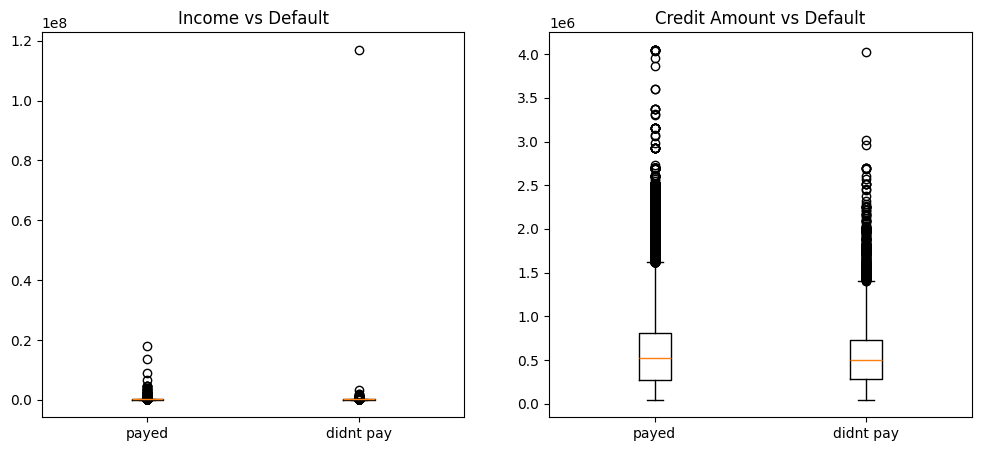

In [5]:
# مقارنة الدخل والـ Credit بين اللي اتخلفوا عن السداد واللي ما اتخلفوش
df_0 = df[df['TARGET'] == 0]
df_1 = df[df['TARGET'] == 1]

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.boxplot([df_0['AMT_INCOME_TOTAL'].dropna(), df_1['AMT_INCOME_TOTAL'].dropna()],
            labels=['payed', 'didnt pay'])
plt.title('Income vs Default')

plt.subplot(1, 2, 2)
plt.boxplot([df_0['AMT_CREDIT'].dropna(), df_1['AMT_CREDIT'].dropna()],
            labels=['payed', 'didnt pay'])
plt.title('Credit Amount vs Default')
plt.show()

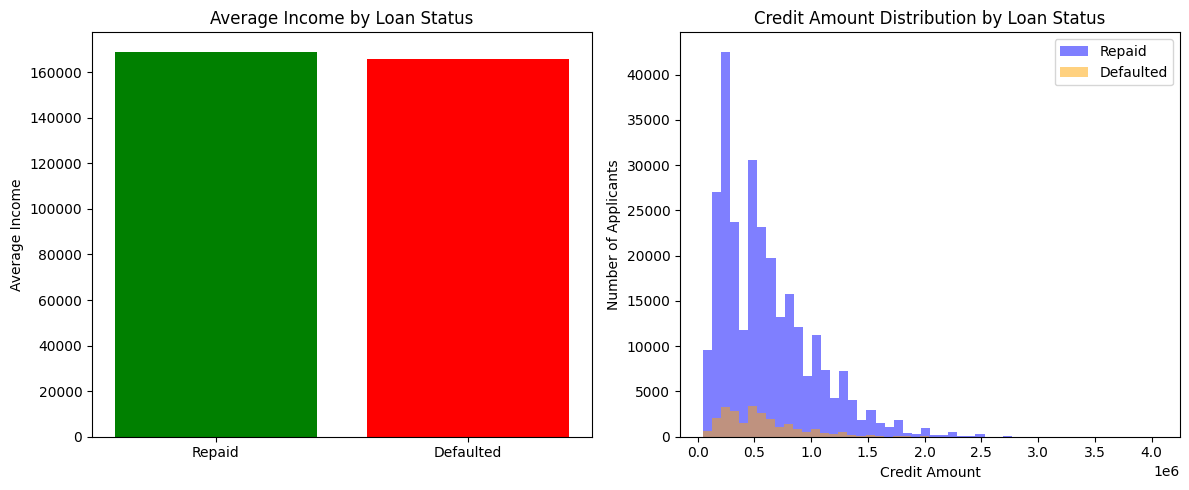

In [14]:
avg_income = df.groupby('TARGET')['AMT_INCOME_TOTAL'].mean()
avg_credit = df.groupby('TARGET')['AMT_CREDIT'].mean()

# Set labels
labels = ['Repaid', 'Defaulted']
x = [0, 1]

plt.figure(figsize=(12, 5))

# Income Bar Chart
plt.subplot(1, 2, 1)
plt.bar(x, avg_income, color=['green', 'red'])
plt.xticks(x, labels)
plt.title('Average Income by Loan Status')
plt.ylabel('Average Income')

plt.subplot(1, 2, 2)
plt.hist(df[df['TARGET'] == 0]['AMT_CREDIT'], bins=50, alpha=0.5, label='Repaid', color='blue')
plt.hist(df[df['TARGET'] == 1]['AMT_CREDIT'], bins=50, alpha=0.5, label='Defaulted', color='orange')
plt.title('Credit Amount Distribution by Loan Status')
plt.xlabel('Credit Amount')
plt.ylabel('Number of Applicants')
plt.legend()

plt.tight_layout()
plt.show()

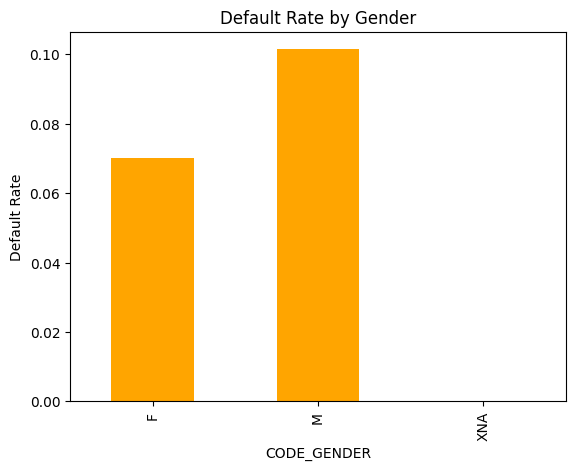

CODE_GENDER
F       69.993282
M      101.419203
XNA      0.000000
Name: TARGET, dtype: float64


In [ ]:
# حسب الجنس
group_gender = df.groupby('CODE_GENDER')['TARGET'].mean()
group_gender.plot(kind='bar', title='Default Rate by Gender', color='orange')
plt.ylabel('Default Rate')
plt.show()
print(group_gender * 1000)

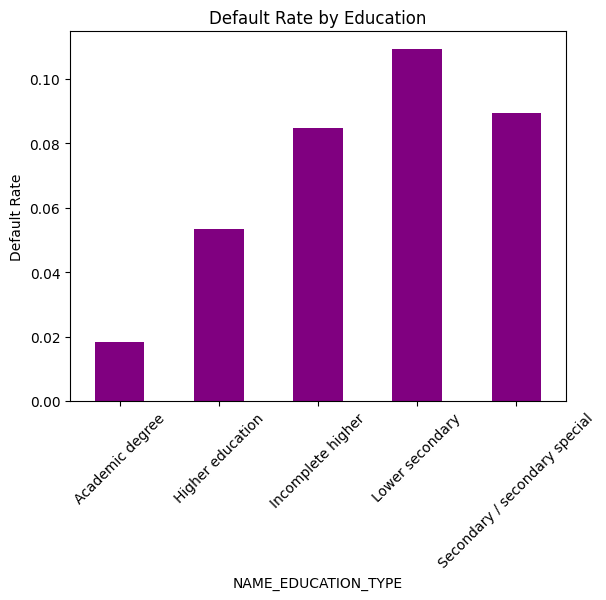

NAME_EDUCATION_TYPE
Academic degree                   18.292683
Higher education                  53.551153
Incomplete higher                 84.849664
Lower secondary                  109.276730
Secondary / secondary special     89.399288
Name: TARGET, dtype: float64


In [7]:
# حسب التعليم
group_edu = df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()
group_edu.plot(kind='bar', title='Default Rate by Education', color='purple')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()
print(group_edu * 1000)

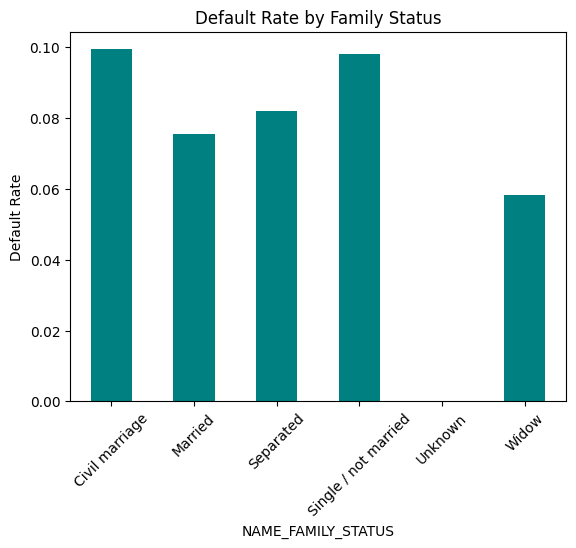

NAME_FAMILY_STATUS
Civil marriage          99.445844
Married                 75.598680
Separated               81.942337
Single / not married    98.076754
Unknown                  0.000000
Widow                   58.242168
Name: TARGET, dtype: float64


In [8]:
# حسب الحالة الاجتماعية
group_family = df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()
group_family.plot(kind='bar', title='Default Rate by Family Status', color='teal')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

print(group_family * 1000)

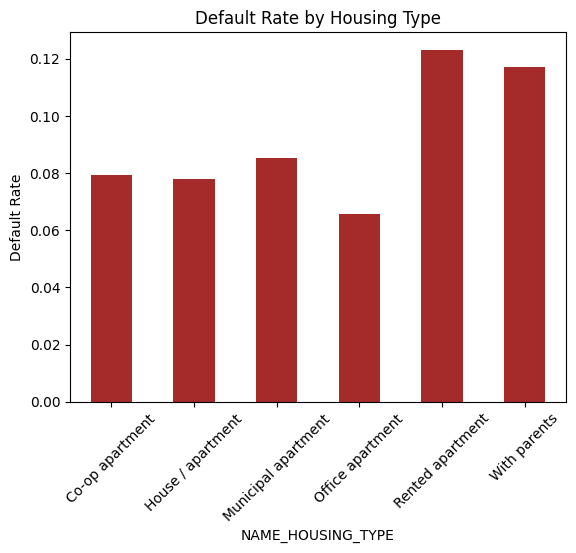

NAME_HOUSING_TYPE
Co-op apartment         79.322638
House / apartment       77.957107
Municipal apartment     85.397478
Office apartment        65.724112
Rented apartment       123.130506
With parents           116.981132
Name: TARGET, dtype: float64


In [9]:
# حسب نوع السكن
group_housing = df.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()
group_housing.plot(kind='bar', title='Default Rate by Housing Type', color='brown')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()
print(group_housing *1000)

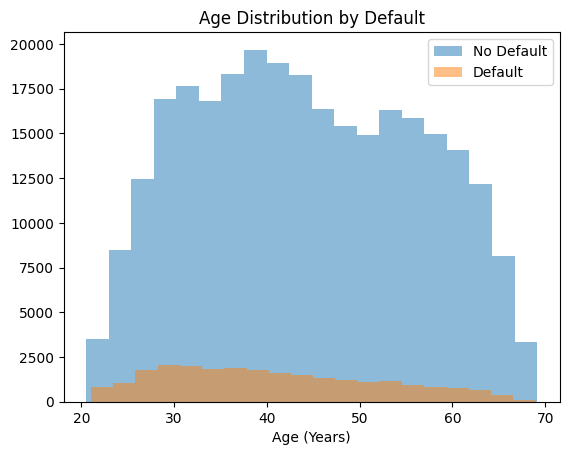

In [10]:
df['AGE_YEARS'] = -df['DAYS_BIRTH'] / 365


# توزيع الأعمار حسب TARGET
plt.hist(df[df['TARGET']==0]['AGE_YEARS'], bins=20, alpha=0.5, label='No Default')
plt.hist(df[df['TARGET']==1]['AGE_YEARS'], bins=20, alpha=0.5, label='Default')
plt.title('Age Distribution by Default')
plt.xlabel('Age (Years)')
plt.legend()
plt.show()

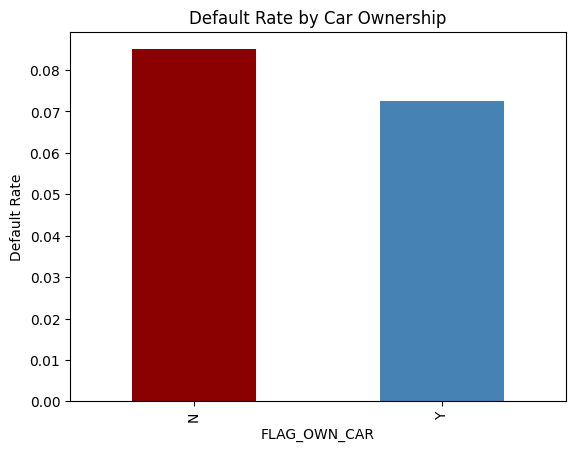

FLAG_OWN_CAR
N    85.002267
Y    72.437301
Name: TARGET, dtype: float64


In [11]:
# ملكية السيارة
car_own = df.groupby('FLAG_OWN_CAR')['TARGET'].mean()
car_own.plot(kind='bar', title='Default Rate by Car Ownership', color=['darkred' , 'steelblue'])
plt.ylabel('Default Rate')
plt.show()
print(car_own * 1000)

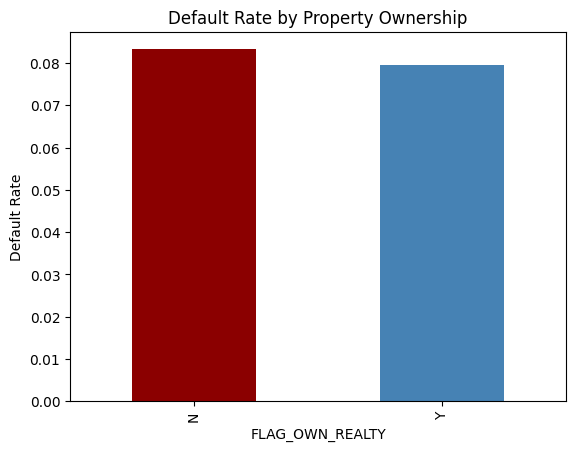

FLAG_OWN_REALTY
N    83.249291
Y    79.615774
Name: TARGET, dtype: float64


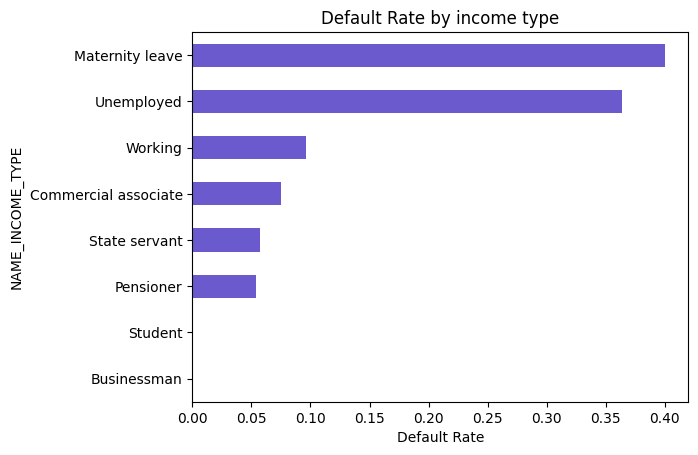

NAME_INCOME_TYPE
Businessman               0.000000
Student                   0.000000
Pensioner                53.863661
State servant            57.549648
Commercial associate     74.842565
Working                  95.884717
Unemployed              363.636364
Maternity leave         400.000000
Name: TARGET, dtype: float64


In [12]:
# ملكية العقار
realty_own = df.groupby('FLAG_OWN_REALTY')['TARGET'].mean()
realty_own.plot(kind='bar', title='Default Rate by Property Ownership', color=['darkred' , 'steelblue'])
plt.ylabel('Default Rate')
plt.show()
print(realty_own * 1000)
#نوع الدخل
income_type = df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values()
income_type.plot(kind='barh', title='Default Rate by income type', color='slateblue')
plt.xlabel('Default Rate')
plt.show()
print(income_type * 1000)